In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
df = df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'Rating']]

In [55]:
data = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   Critic_Score     8137 non-null   float64
 5   Rating           9949 non-null   object 
dtypes: float64(2), object(4)
memory usage: 783.6+ KB


In [6]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing(df)

,Total,Percent
Critic_Score,8578,51.319174
Rating,6766,40.478612
Year_of_Release,269,1.609333
Name,2,0.011965
Genre,2,0.011965
Platform,0,0.000000


## Обработка пропусков в числовых данных

In [7]:
total_count = df.shape[0]

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt =='int64') :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year_of_Release. Тип данных float64. Количество пустых значений 269, 1.61%.
Колонка Critic_Score. Тип данных float64. Количество пустых значений 8578, 51.32%.


In [9]:
df_num = df[num_cols]
df_num

,Year_of_Release,Critic_Score
0,2006.0,76.0
1,1985.0,NaN
2,2008.0,82.0
3,2009.0,80.0
4,1996.0,NaN
...,...,...
16710,2016.0,NaN
16711,2006.0,NaN
16712,2016.0,NaN
16713,2003.0,NaN


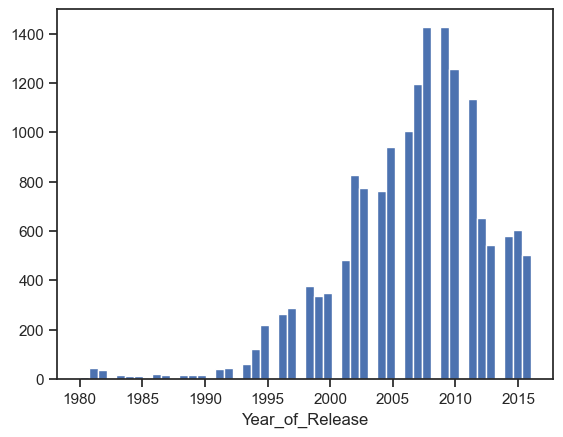

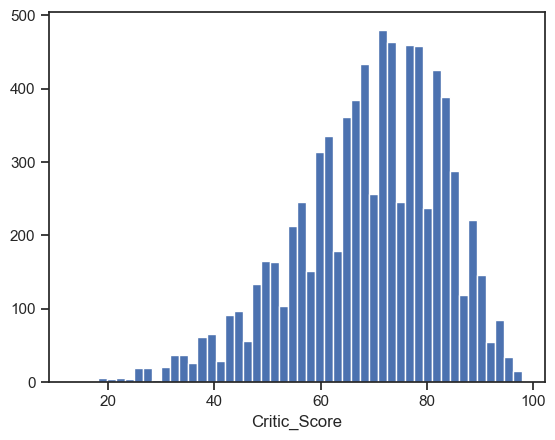

In [10]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [11]:
data_num_year = df_num[['Year_of_Release']]
data_num_year.head()

,Year_of_Release
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0


In [12]:
#Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()#где были пропуски и чем их заменили 
mask_missing_values_only = indicator.fit_transform(data_num_year)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [13]:
strategies=['mean', 'median', 'most_frequent'] 
#какими значениями будем заполнять 

In [14]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_year)#заполнение пропусков
    return data_num_imp[mask_missing_values_only]

In [15]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2006.48461632, 2006.48461632,
        2006.48461632, 2006.48461632, 2

In [16]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 20

In [17]:
strategies[2], test_num_impute(strategies[2])

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('most_frequent',
 array([2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008., 2008.,
        2008., 2008., 2008., 2008., 2008., 2008., 2008., 20

In [18]:
df[['Critic_Score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0


In [19]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [20]:
test_num_impute_col(df, 'Critic_Score', strategies[0])

('Critic_Score', 'mean', 8578, 68.96767850559173, 68.96767850559173)

In [21]:
test_num_impute_col(df, 'Critic_Score', strategies[1])

('Critic_Score', 'median', 8578, 71.0, 71.0)

In [22]:
test_num_impute_col(df, 'Critic_Score', strategies[2])

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('Critic_Score', 'most_frequent', 8578, 70.0, 70.0)

Заметим, что и в столбце Critic_Score, и Year_of_Release данные распределены однотонно, применив методы заметим, что все три стратегии лежат рядом (те имею одинаковое значение). 
Поэтому есть смысл заполнить пропуски в столбцах медианой или среднем значением. 

In [23]:
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].mean())

In [24]:
df['Year_of_Release'] = df['Year_of_Release'].fillna(df['Year_of_Release'].mean())

## Обработка пропусков в категориальных данных

In [25]:
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and dt=='object' :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Name. Тип данных object. Количество пустых значений 2, 0.01%.
Колонка Genre. Тип данных object. Количество пустых значений 2, 0.01%.
Колонка Rating. Тип данных object. Количество пустых значений 6766, 40.48%.


In [42]:
cat_temp_data = df[['Rating']]
cat_temp_data.head()

,Rating
0,E
1,NaN
2,E
3,E
4,NaN


In [43]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['E'],
       ['E'],
       ['E'],
       ...,
       ['E'],
       ['E'],
       ['E']], dtype=object)

In [44]:
np.unique(data_imp2)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [45]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['E'],
       ['NA'],
       ['E'],
       ...,
       ['NA'],
       ['NA'],
       ['NA']], dtype=object)

In [46]:
np.unique(data_imp3)

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'NA', 'RP', 'T'], dtype=object)

In [50]:
col = ['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'NA', 'RP', 'T']
for i in col: 
    k = data_imp3[data_imp3==i].size
    print('Количество вхожденией по {} равно {}'.format(i, k))

Количество вхожденией по AO равно 1
Количество вхожденией по E равно 3990
Количество вхожденией по E10+ равно 1420
Количество вхожденией по EC равно 8
Количество вхожденией по K-A равно 3
Количество вхожденией по M равно 1563
Количество вхожденией по NA равно 6766
Количество вхожденией по RP равно 3
Количество вхожденией по T равно 2961


Чаще всего встречается значение NA, поэтому заполним ими пропуски в столбце Rating

In [51]:
df['Rating']= df['Rating'].fillna('NA')

Данные в столбцах Name и Genre заполнить часто встречающими значениями было бы нелогично, поэтому заполним данные константой

In [52]:
df['Name']= df['Name'].fillna('unk')

In [53]:
df['Genre']= df['Genre'].fillna('unk')

### Проверим пропуски 

In [54]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Critic_Score       0
Rating             0
dtype: int64

### Преобразование категориальных признаков в числовые

In [56]:
cat_temp_df = df[['Rating']]
cat_temp_df.head()

imp2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(cat_temp_df)
df_imp2

cat_enc = pd.DataFrame({'c1':df_imp2.T[0]})
cat_enc

,c1
0,E
1,NA
2,E
3,E
4,NA
...,...
16710,NA
16711,NA
16712,NA
16713,NA


### Кодирование категорий наборами бинарных значений

In [57]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(16715, 1)

In [58]:
cat_enc_ohe.shape

(16715, 9)

In [59]:
cat_enc_ohe

<16715x9 sparse matrix of type '<class 'numpy.float64'>'
	with 16715 stored elements in Compressed Sparse Row format>

In [60]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [61]:
cat_enc.head(10)

,c1
0,E
1,NA
2,E
3,E
4,NA
5,NA
6,E
7,E
8,E
9,NA


In [62]:
pd.get_dummies(cat_enc).head()

,c1_AO,c1_E,c1_E10+,c1_EC,c1_K-A,c1_M,c1_NA,c1_RP,c1_T
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [63]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,Rating_nan
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [64]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(df[['Genre']])

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [66]:
le.inverse_transform([0, 1, 2, 3])

array(['Action', 'Adventure', 'Fighting', 'Misc'], dtype=object)

### Масштабирование данных

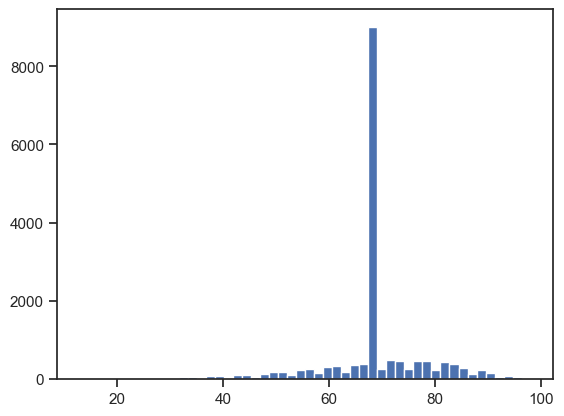

In [39]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Critic_Score']])

plt.hist(df['Critic_Score'], 50)
plt.show()

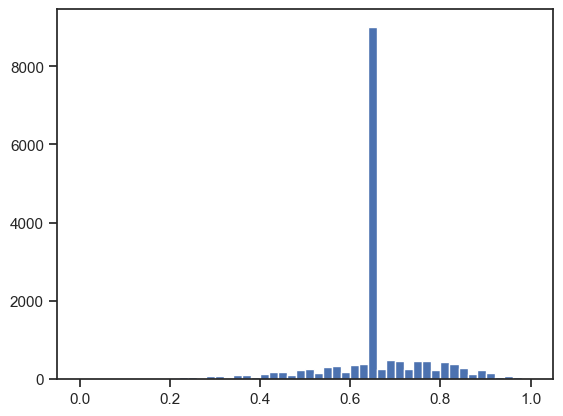

In [40]:
plt.hist(sc1_data, 50)
plt.show()